In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
os.chdir(r'D:\jupyter\rs_school\homework_3')

In [38]:
titanic_df = pd.read_csv('train.csv')

Сразу бросается в глаза отсутствие информации в колонке Cabin. 
Я подумал,что довольно проблематично узнать номер кабины погибшего
и здесь возможна какая-то зависимость. И она есть!!!

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


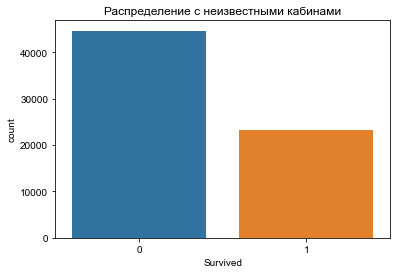

In [6]:
sns.countplot(data=titanic_df[titanic_df['Cabin'].isna()==True],
              x='Survived')
sns.set_style('whitegrid')
plt.title('Распределение с неизвестными кабинами');
plt.show()

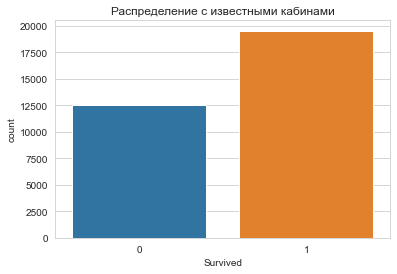

In [7]:
sns.countplot(data=titanic_df[titanic_df['Cabin'].isna()==False],
              x='Survived')
plt.title('Распределение с известными кабинами');

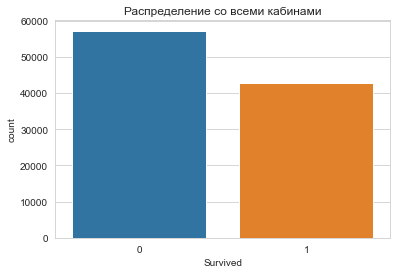

In [8]:
sns.countplot(data=titanic_df, x='Survived')
plt.title('Распределение со всеми кабинами');

По такой же логике можно проверить значения с nan в любой колонке.

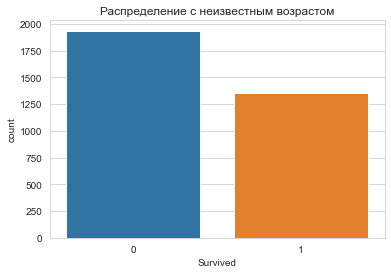

In [9]:
#Age

sns.countplot(data=titanic_df[titanic_df['Age'].isna()==True],
              x='Survived')
plt.title('Распределение с неизвестным возрастом');

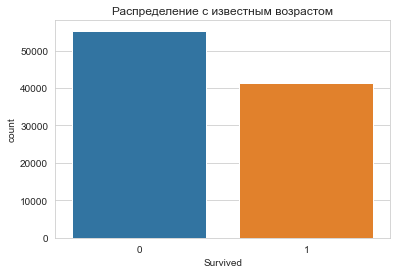

In [10]:
sns.countplot(data=titanic_df[titanic_df['Age'].isna()==False],
              x='Survived')
plt.title('Распределение с известным возрастом');

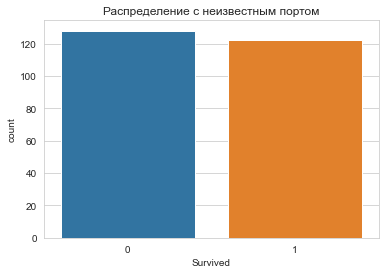

In [11]:
# embarked

sns.countplot(data=titanic_df[titanic_df['Embarked'].isna()==True],
              x='Survived')
plt.title('Распределение с неизвестным портом');

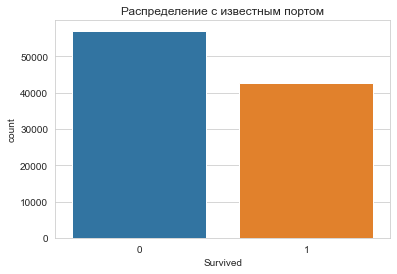

In [12]:
sns.countplot(data=titanic_df[titanic_df['Embarked'].isna()==False],
              x='Survived')
plt.title('Распределение с известным портом');

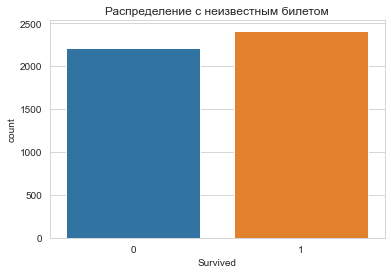

In [13]:
# ticket
sns.countplot(data=titanic_df[titanic_df['Ticket'].isna()==True],
              x='Survived')
plt.title('Распределение с неизвестным билетом');

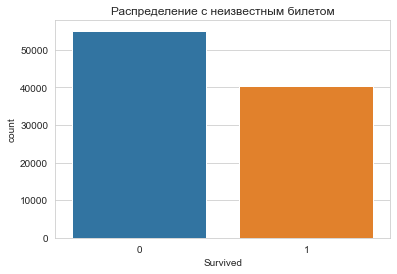

In [14]:
sns.countplot(data=titanic_df[titanic_df['Ticket'].isna()==False],
              x='Survived')
plt.title('Распределение с неизвестным билетом');

In [15]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


Как видно, с остальными колонками корреляция nan-выжил
не работает (с билетом даже наоборот: если информации о билете нету - то человек выживет с большей вероятностью, хз как это работает)) ). Следовательно не будет преступлением nan в кабинах заменить на "None info" и существующие на "Exist info" (так проверять взаимосвязи по номеру кабины я не собираюсь). Во всех остальных колонках - на медианы и моды. Так же я бы удалил колонку Name и Tickets, так как не думаю, что из номера билета можно вытянуть серьёзную инфу (даа, возможно номер привязан к классу например, но так глубоко лезть я не собираюсь). 

In [39]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df['Fare'].median())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])
titanic_df.loc[titanic_df['Cabin'].isnull()==False, 'Cabin'] ='Exist info'
titanic_df.loc[titanic_df['Cabin'].isnull()==True, 'Cabin'] ='None info'
titanic_df = titanic_df.drop(['Name', 'Ticket'], axis=1)

# Для удобства округлим возраст до целого
titanic_df.Age = titanic_df.Age.apply(int)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Sex          100000 non-null  object 
 4   Age          100000 non-null  int64  
 5   SibSp        100000 non-null  int64  
 6   Parch        100000 non-null  int64  
 7   Fare         100000 non-null  float64
 8   Cabin        100000 non-null  object 
 9   Embarked     100000 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 7.6+ MB


In [40]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1,1,male,39,2,0,27.14,Exist info,S
1,1,0,3,male,39,0,0,13.35,None info,S
2,2,0,3,male,0,1,2,71.29,None info,S
3,3,0,3,male,19,0,0,13.04,None info,S
4,4,1,3,male,25,0,0,7.76,None info,S


Дальнейший EDA мне пока представляется в ключе поиска взаимосвязи умер человек или нет с какими-то переменными. По ходу процесса возможно придумается что-то ещё.

In [41]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,0.427740,2.106910,38.370970,0.397690,0.454560,43.903241
std,28867.657797,0.494753,0.837727,18.016718,0.862566,0.950076,69.545827
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.680000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.040000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.460000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.470000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.660000


С виду не наблюдается каких-выбросов в представленных колонках.

In [42]:
titanic_df_corr = titanic_df.corr()
titanic_df_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.001956,-0.000893,-0.002612,0.001000,0.000411,-0.000944
Survived,0.001956,1.000000,-0.289723,0.102131,-0.007587,0.023352,0.187376
Pclass,-0.000893,-0.289723,1.000000,-0.254838,-0.051436,-0.041848,-0.417054
Age,-0.002612,0.102131,-0.254838,1.000000,-0.110887,-0.123828,0.107155
SibSp,0.001000,-0.007587,-0.051436,-0.110887,1.000000,0.213126,0.059369
Parch,0.000411,0.023352,-0.041848,-0.123828,0.213126,1.000000,0.061401
Fare,-0.000944,0.187376,-0.417054,0.107155,0.059369,0.061401,1.000000


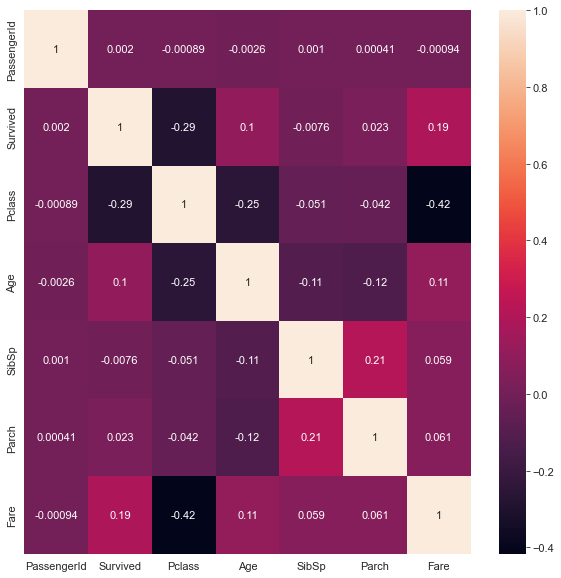

In [43]:
matplotlib.rcParams['font.size']=11
matplotlib.rcParams['figure.figsize']=(10, 10)
sns.heatmap(data=titanic_df_corr, annot=True)
plt.show()

Полученная матрица не может похвастаться содержательностью. Единственно заметная взаимосвязь стоимоти билета и класса пассажиров. Что ж, закономерно.

In [44]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1,1,male,39,2,0,27.14,Exist info,S
1,1,0,3,male,39,0,0,13.35,None info,S
2,2,0,3,male,0,1,2,71.29,None info,S
3,3,0,3,male,19,0,0,13.04,None info,S
4,4,1,3,male,25,0,0,7.76,None info,S


Дальнейший EDA мне пока представляется в ключе поиска взаимосвязи умер человек или нет с какими-то переменными. По ходу процесса возможно придумается что-то ещё.

Первая взаимосвязь, которая приходит в голову,что самые богатые выживут с большей вероятностью. Проверим эту взаимосвязь. Во-первых узнаем сколько было человек по классам.

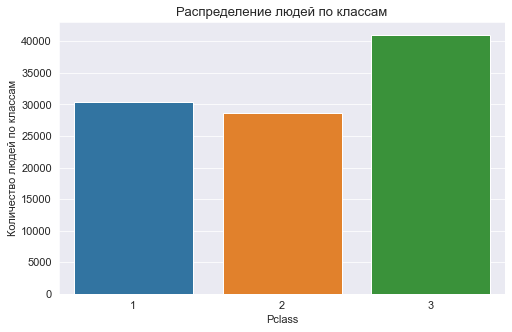

In [53]:
pclass_df = titanic_df.groupby('Pclass')['PassengerId'] \
.count().rename('People').reset_index()
pclass_dead_df = titanic_df[titanic_df['Survived']==0].groupby('Pclass')['PassengerId'] \
.count().rename('Number_of_dead').reset_index()
pclass_dead_df
pclass_df = pd.merge(left=pclass_df, right=pclass_dead_df, on=['Pclass'])
pclass_df['Number_of_survived'] = pclass_df['People'] - pclass_df['Number_of_dead']
pclass_df['Percent_of_deaths_by_class'] = 100 * pclass_df['Number_of_dead'] / pclass_df['People']
pclass_df['Percent_of_dead_of_all'] = 100 * pclass_df['Number_of_dead'] / pclass_df['Number_of_dead'].sum()


sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=11
matplotlib.rcParams['figure.figsize']=(8, 5)
sns.barplot(data=pclass_df, x='Pclass', y='People')
plt.title('Распределение людей по классам')
plt.ylabel('Количество людей по классам');

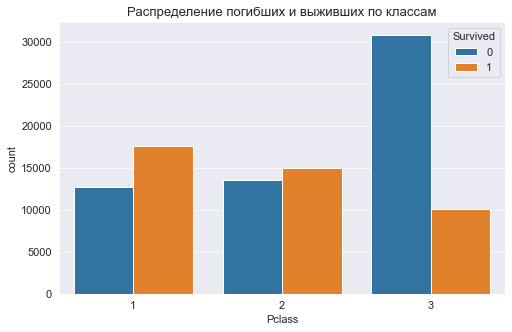

In [91]:
sns.countplot(x=titanic_df['Pclass'], hue=titanic_df['Survived'])
plt.title('Распределение погибших и выживших по классам');

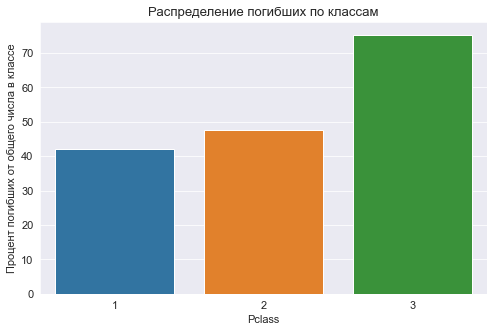

In [54]:

sns.barplot(data=pclass_df, x='Pclass', y='Percent_of_deaths_by_class')
plt.title('Распределение погибших по классам')
plt.ylabel('Процент погибших от общего числа в классе');

Итак, мы видим, что на 3-й класс пришлось более половины от всех погибших. В свою очередь из пассажиров 3-го класса выжило менее 25%.

Так же, я уверен, на корабле в большинстве присутствовали истинно английские джентельмены, которые были готовы отдать драгоценные места на шлюпках девушкам. Проверим это.


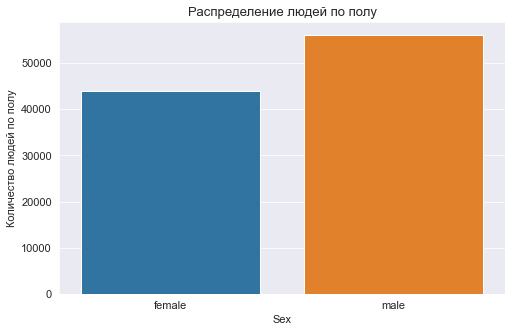

In [47]:
sex_df = titanic_df.groupby('Sex')['PassengerId'] \
.count().rename('Number').reset_index()
sex_dead_df = titanic_df[titanic_df['Survived']==0].groupby('Sex')['PassengerId'] \
.count().rename('Number_of_dead').reset_index()
sex_df = pd.merge(left=sex_df, right=sex_dead_df, on=['Sex'])
sex_df['Number_of_survived'] = sex_df['Number'] - sex_df['Number_of_dead']
sex_df['Percent_of_deaths_by_sex'] = 100 * sex_df['Number_of_dead'] / sex_df['Number']
sex_df['Percent_of_dead_of_all'] = 100 * sex_df['Number_of_dead'] / sex_df['Number_of_dead'].sum()

sns.barplot(data=sex_df, x='Sex', y='Number')
plt.title('Распределение людей по полу')
plt.ylabel('Количество людей по полу');

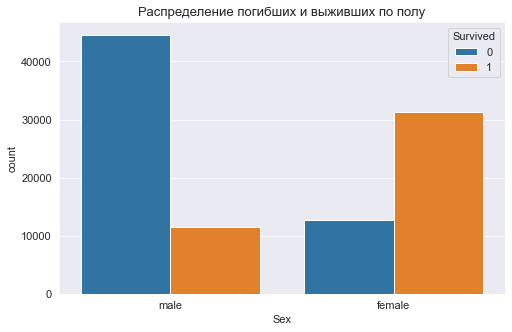

In [92]:
sns.countplot(x=titanic_df["Sex"], hue=titanic_df['Survived'])
plt.title('Распределение погибших и выживших по полу');

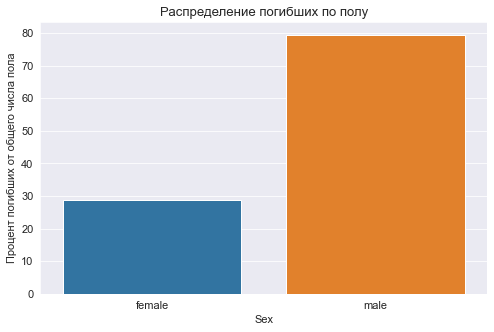

In [48]:
sns.barplot(data=sex_df, x='Sex', y='Percent_of_deaths_by_sex')
plt.title('Распределение погибших по полу')
plt.ylabel('Процент погибших от общего числа пола');

Как оказалось, пол являлся ещё более важным признаком, выживет человек или нет. Почти 80% от всех погибших являются мужчины.

Проверим остальные колонки, потенциально влияющие на шанс выживания человека колонки: возраст, наличие братьев/сестёр/родителей на борту, порт посадки.

Очень важно отображать процент погибших определённого возраста от общего количества людей этого возраста (например погибшие 20-летние от количества 20-летних, а не от общего количества пассажиров Титаника). Я изначально строил графики именно от общего количества и с возрастом  именно.

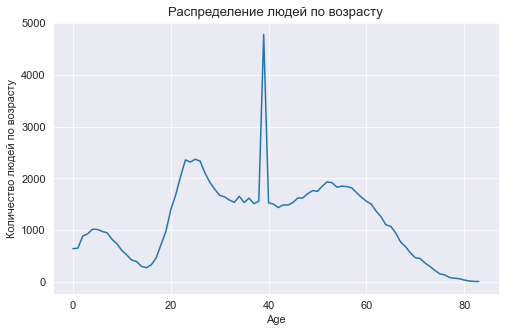

In [50]:
#Age

age_df = titanic_df.groupby('Age')['PassengerId'] \
.count().rename('Number').reset_index()
age_dead_df = titanic_df[titanic_df['Survived']==0].groupby('Age')['PassengerId'] \
.count().rename('Number_of_dead').reset_index()
age_df = pd.merge(left=age_df, right=age_dead_df, on=['Age'])
age_df['Number_of_survived'] = age_df['Number'] - age_df['Number_of_dead']
age_df['Percent_of_deaths_by_age'] = age_df['Number_of_dead'] / age_df['Number'] *100
age_df['Percent_of_dead_of_all'] = 100 * age_df['Number_of_dead'] / age_df['Number_of_dead'].sum()

sns.lineplot(data=age_df,x='Age', y='Number')
plt.title('Распределение людей по возрасту')
plt.ylabel('Количество людей по возрасту');

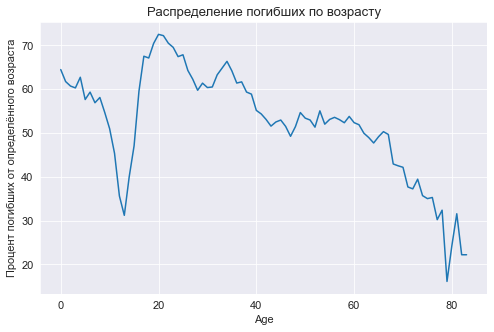

In [51]:
sns.lineplot(data=age_df,x='Age', y='Percent_of_deaths_by_age')
plt.title('Распределение погибших по возрасту')
plt.ylabel('Процент погибших от определённого возраста');

Очень важно отображать процент погибших определённого возраста от общего количества людей этого возраста (например погибшие 20-летние от количества 20-летних, а не от общего количества пассажиров Титаника). Я изначально строил графики именно от общего количества и именно с возрастом я сделал неправильные выводы, выводя просто количество погибших определённого возраста. Как видим, практически полностью симметричен простому распределению по возрасту.

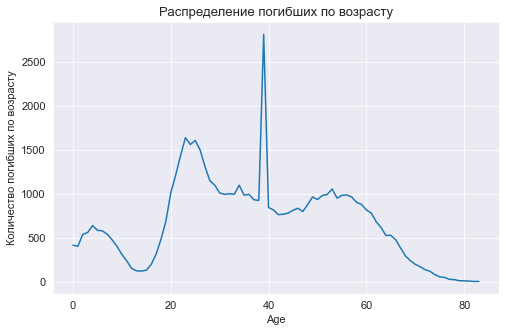

In [52]:
sns.lineplot(data=age_df,x='Age', y='Number_of_dead')
plt.title('Распределение погибших по возрасту')
plt.ylabel('Количество погибших по возрасту');

Как мы видели ранее, самый неудачный возраст на титанике - это 20, потому что только 30% 20-летних удалось выжить.

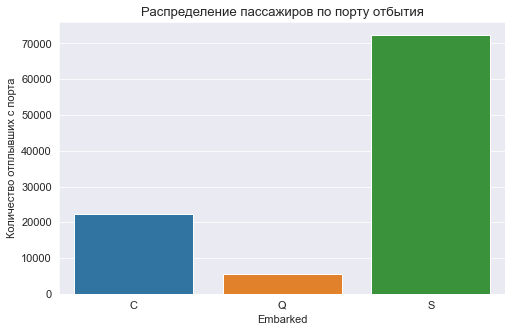

In [61]:
# Embarked

embarked_df = titanic_df.groupby('Embarked')['PassengerId'] \
.count().rename('Number').reset_index()
embarked_dead_df = titanic_df[titanic_df['Survived']==0].groupby('Embarked')['PassengerId'] \
.count().rename('Number_of_dead').reset_index()
embarked_df = pd.merge(left=embarked_df, right=embarked_dead_df, on=['Embarked'])
embarked_df['Number_of_survived'] = embarked_df['Number'] - embarked_df['Number_of_dead']
embarked_df['Percent_of_deaths_by_embarked'] = 100 * embarked_df['Number_of_dead'] / embarked_df['Number']
embarked_df['Percent_of_dead_of_all'] = 100  * embarked_df['Number_of_dead'] / embarked_df['Number_of_dead'].sum()

sns.barplot(data=embarked_df, x='Embarked', y='Number')
plt.title('Распределение пассажиров по порту отбытия')
plt.ylabel('Количество отплывших с порта');

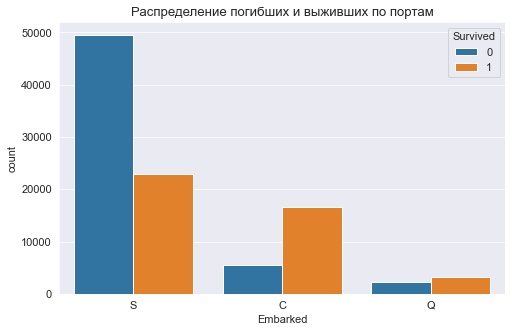

In [62]:
sns.countplot(x=titanic_df['Embarked'], hue=titanic_df['Survived'])
plt.title('Распределение погибших и выживших по портам');

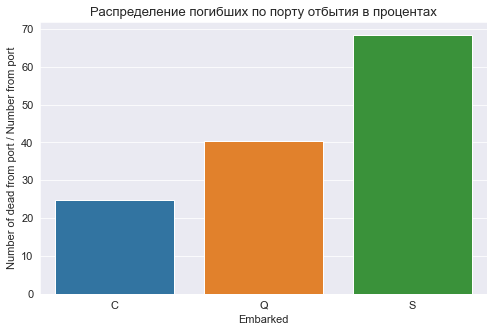

In [64]:
sns.barplot(data=embarked_df, x='Embarked', y='Percent_of_deaths_by_embarked')
plt.title('Распределение погибших по порту отбытия в процентах')
plt.ylabel('Number of dead from port / Number from port');


Как видно, процент погибших, отплывших с Саутгемптона наибольший. Также именно с Саугемптона отплыло наибольшее количество людей. Скорее всего почти весь 3-й класс отплыл именно оттуда.

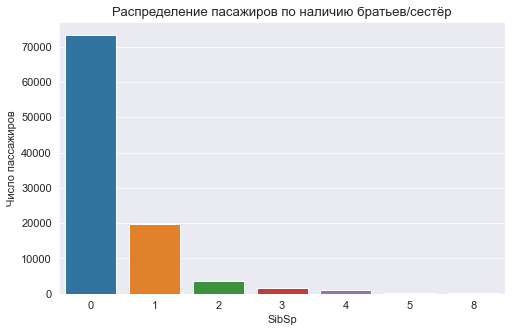

In [69]:
# SibSp

sibsp_df = titanic_df.groupby('SibSp')['PassengerId'] \
.count().rename('Number').reset_index()
sibsp_dead_df = titanic_df[titanic_df['Survived']==0].groupby('SibSp')['PassengerId'] \
.count().rename('Number_of_dead').reset_index()
sibsp_df = pd.merge(left=sibsp_df, right=sibsp_dead_df, on=['SibSp'])
sibsp_df['Number_of_survived'] = sibsp_df['Number'] - sibsp_df['Number_of_dead']
sibsp_df['Percent_of_deaths_by_SibSp'] = 100 * sibsp_df['Number_of_dead'] / sibsp_df['Number']
sibsp_df['Percent_of_dead_of_all'] = 100  * sibsp_df['Number_of_dead'] / sibsp_df['Number_of_dead'].sum()

sns.barplot(data=sibsp_df, x='SibSp', y='Number')
plt.title('Распределение пасажиров по наличию братьев/сестёр')
plt.ylabel('Число пассажиров');

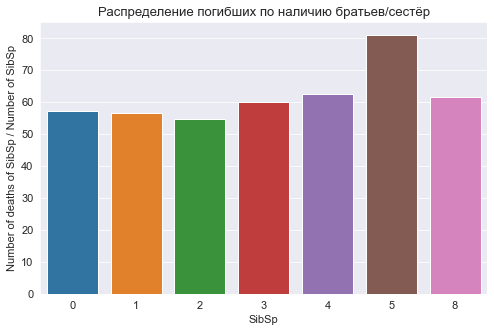

In [68]:

sns.barplot(data=sibsp_df, x='SibSp', y='Percent_of_deaths_by_SibSp')
plt.title('Распределение погибших по наличию братьев/сестёр')
plt.ylabel('Number of deaths of SibSp / Number of SibSp');

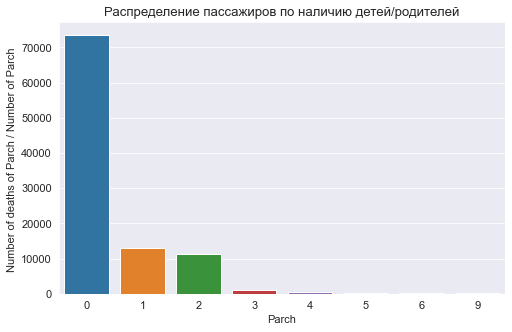

In [74]:
# parch

parch_df = titanic_df.groupby('Parch')['PassengerId'] \
.count().rename('Number').reset_index()
parch_dead_df = titanic_df[titanic_df['Survived']==0].groupby('Parch')['PassengerId'] \
.count().rename('Number_of_dead').reset_index()
parch_df = pd.merge(left=parch_df, right=parch_dead_df, on=['Parch'])
parch_df['Number_of_survived'] = parch_df['Number'] - parch_df['Number_of_dead']
parch_df['Percent_of_deaths_by_parch'] = 100 * parch_df['Number_of_dead'] / parch_df['Number']
parch_df['Percent_of_dead_of_all'] = 100  * parch_df['Number_of_dead'] / parch_df['Number_of_dead'].sum()

sns.barplot(data=parch_df, x='Parch', y='Number')
plt.title('Распределение пассажиров по наличию детей/родителей')
plt.ylabel('Number of deaths of Parch / Number of Parch ');


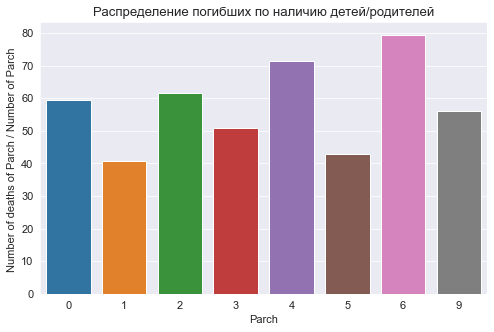

In [76]:
sns.barplot(data=parch_df, x='Parch', y='Percent_of_deaths_by_parch')
plt.title('Распределение погибших по наличию детей/родителей')
plt.ylabel('Number of deaths of Parch / Number of Parch ');


Как видно, по наличию братьев/сестёр и родителей/детей есть явный перекос (у абсолютного большинства пассажиров никого не было) и поэтому полученные распределения играют очень малую роль (пассажиры у кого 6 детей умрут с наибольшей вероятностью, но какой смысл говориь о них если их меньше десятой процента от общего количества).

Мы проанализировали влияние каждой переменной на то, выживет человек или нет. Можно сделать вывод, что если мы берём обычного работягу-парнишу 20-лет из Саутгемптона, то для него у нас плохие новости. Давайте выберем пассажиров с такими параметрами (+ с отсутсвующими кабинами) и проверим процент погибших.


In [77]:
potentially_dead= titanic_df.loc[
    (titanic_df['Pclass']==3) &
    (titanic_df['Sex']=='male') &
    (titanic_df['Age'].between(20,22)) &
    (titanic_df['Embarked']=='S') &
    (titanic_df['Cabin']=='None info')
]

In [78]:
potentially_dead_group = potentially_dead.groupby('Survived')['PassengerId'] \
.count().rename('Number').reset_index()
potentially_dead_group['Percent'] = potentially_dead_group['Number'] / potentially_dead_group['Number'].sum()
potentially_dead_group

,Survived,Number,Percent
0,0,2043,0.903183
1,1,219,0.096817


In [79]:
male_df= titanic_df.loc[titanic_df['Sex']=='male']
male_df_group = male_df.groupby('Survived')['PassengerId'] \
.count().rename('Number').reset_index()
male_df_group['Percent'] = male_df_group['Number'] / male_df_group['Number'].sum()
male_df_group

,Survived,Number,Percent
0,0,44566,0.794205
1,1,11548,0.205795


Мы видим, что согласно нашим критериям, погибшими оказалось около 90%. Для сравнения я взял самый важный критерий пол и согласно ему мы получили 80% погибших. 

In [80]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1,1,male,39,2,0,27.14,Exist info,S
1,1,0,3,male,39,0,0,13.35,None info,S
2,2,0,3,male,0,1,2,71.29,None info,S
3,3,0,3,male,19,0,0,13.04,None info,S
4,4,1,3,male,25,0,0,7.76,None info,S


Только что я немного познакомился с pivot_table, поэтому выведу пару таблиц, которые, вероятно, не несут весомой значимости.

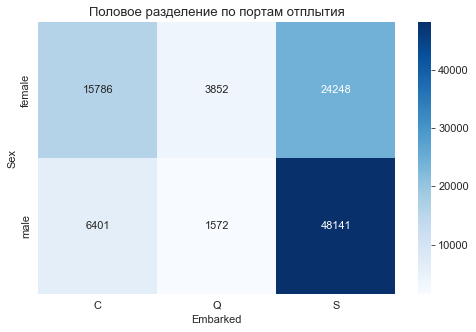

In [85]:
sex_embarked = titanic_df.pivot_table(index='Sex',
                       columns='Embarked',
                       values='Age',
                       aggfunc='count')
sns.heatmap(data=sex_embarked, annot=True, fmt='g', cmap='Blues')
plt.title('Половое разделение по портам отплытия');

Из этого heatmap мы видим, что из Cherbourg и Queenstown отплывали преимущественно девушки и женщины. А из Southampton - мужчины.

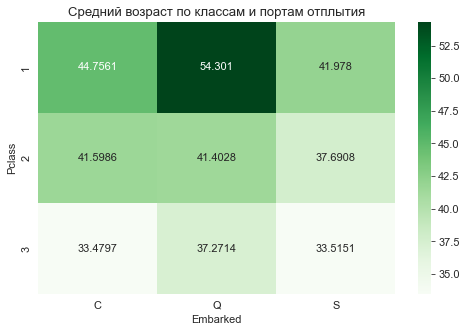

In [84]:
a = titanic_df.pivot_table(index='Pclass',
                       columns='Embarked',
                       values='Age',
                       aggfunc='mean')
sns.heatmap(a, annot=True, fmt='g', cmap='Greens');
plt.title('Средний возраст по классам и портам отплытия');

Как видим, пассажиры 1-го класса наиболее возрастные. Именно Квинстаун является самым возрастным городом (у 1-го класса отрыв серьёзный).

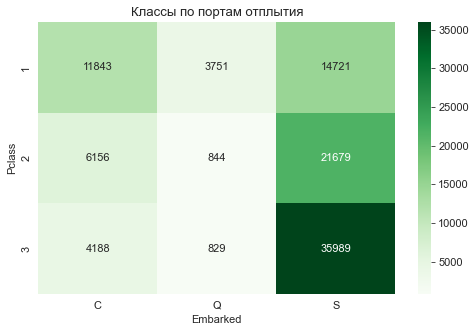

In [89]:
a = titanic_df.pivot_table(index='Pclass',
                           columns='Embarked',
                           values='Age',
                           aggfunc='count')
sns.heatmap(a, annot=True, fmt='g', cmap='Greens');
plt.title('Классы по портам отплытия');

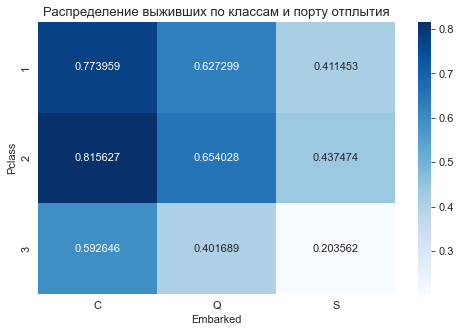

In [103]:
a = titanic_df.pivot_table(index='Pclass',
                           columns='Embarked',
                           values='Survived',
                           aggfunc='mean')
sns.heatmap(a, annot=True, fmt='g', cmap='Blues');
plt.title('Распределение выживших по классам и порту отплытия');

In [ ]:
# end